In [15]:
import glob
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pydicom
import imageio
import pandas as pd

In [2]:
def get_cube_from_img(img3d, center, block_size):
    """"Code for this function is based on code from this repository: https://github.com/junqiangchen/LUNA16-Lung-Nodule-Analysis-2016-Challenge"""
    # get roi(z,y,z) image and in order the out of img3d(z,y,x)range
    center_z = center[0]
    center_y = center[1]
    center_x = center[2]
    start_x = max(center_x - block_size / 2, 0)
    if start_x + block_size > img3d.shape[2]:
        start_x = img3d.shape[2] - block_size
    start_y = max(center_y - block_size / 2, 0)
    if start_y + block_size > img3d.shape[1]:
        start_y = img3d.shape[1] - block_size
    start_z = max(center_z - block_size / 2, 0)
    if start_z + block_size > img3d.shape[0]:
        start_z = img3d.shape[0] - block_size
    start_z = int(start_z)
    start_y = int(start_y)
    start_x = int(start_x)
    roi_img3d = img3d[start_z:start_z + block_size, start_y:start_y + block_size, start_x:start_x + block_size]
    return roi_img3d

## Annotation Regions of Interest (Cancer)

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969


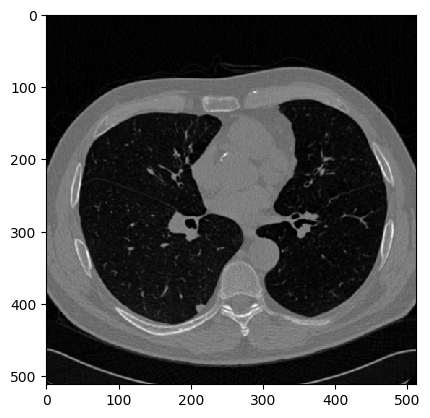

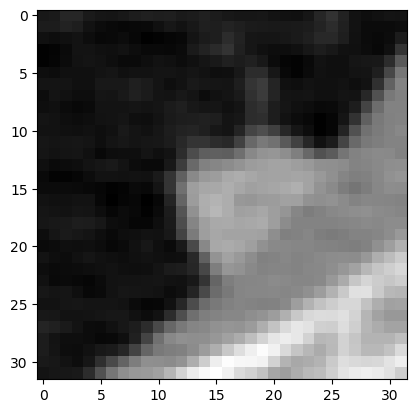

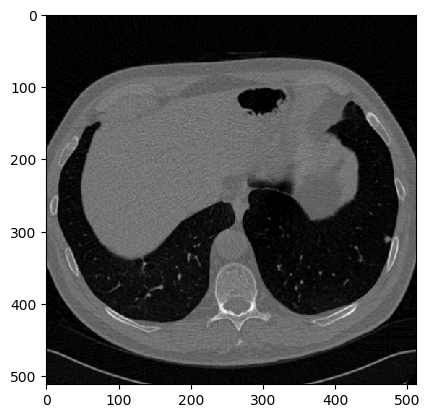

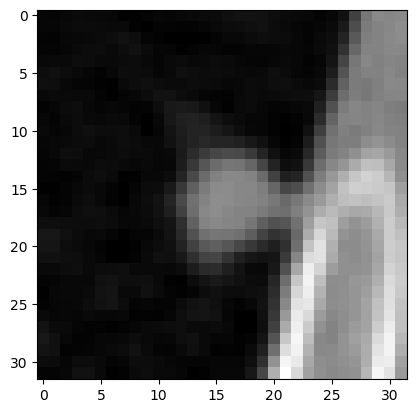

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.631047517458234322522264161877


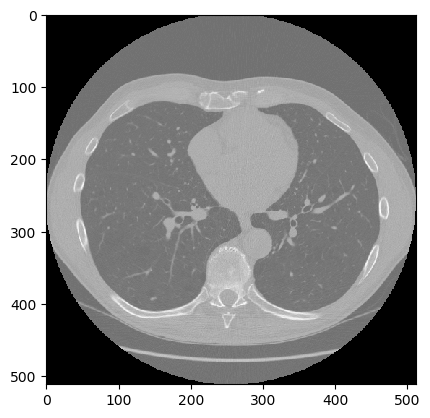

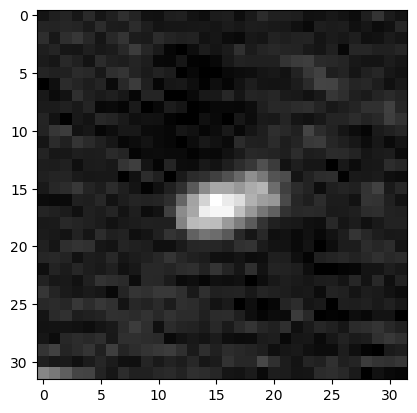

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.142154819868944114554521645782


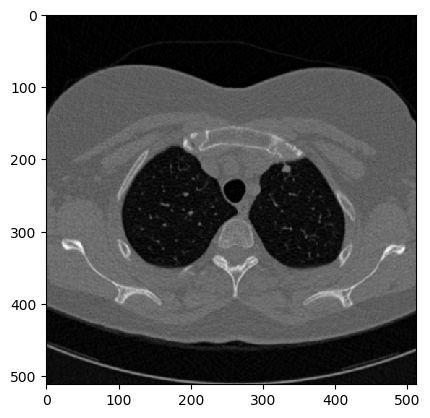

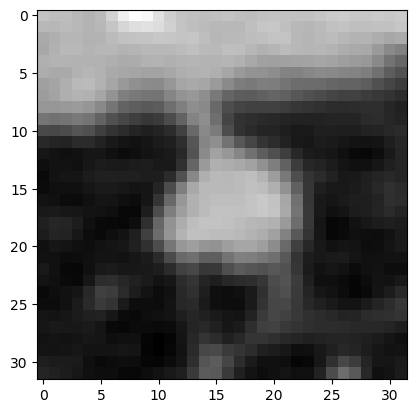

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.265453131727473342790950829556


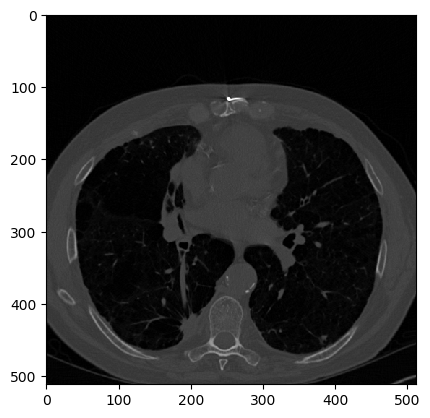

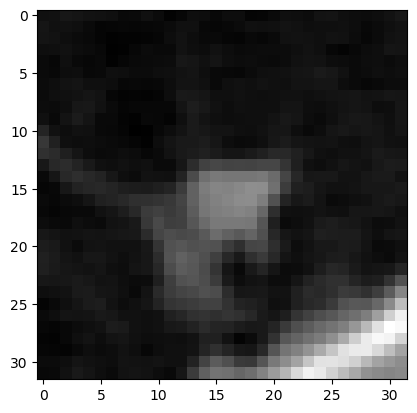

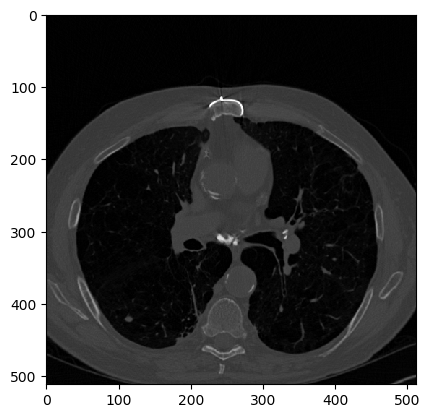

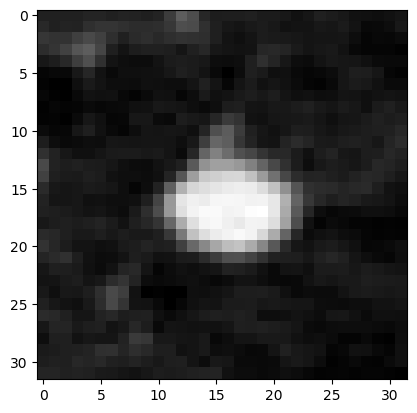

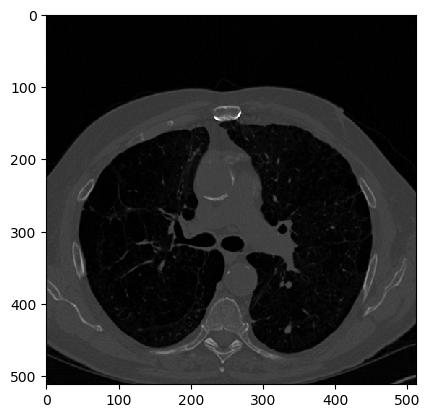

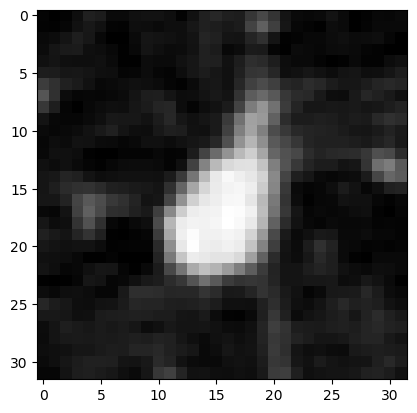

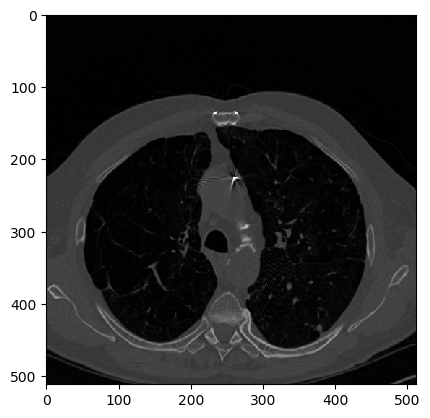

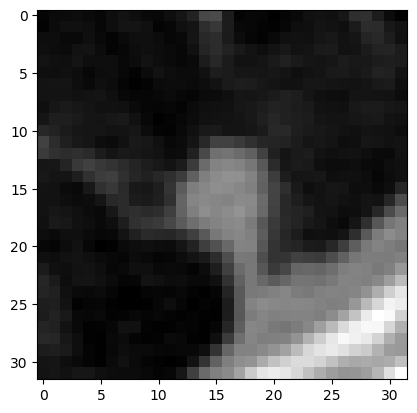

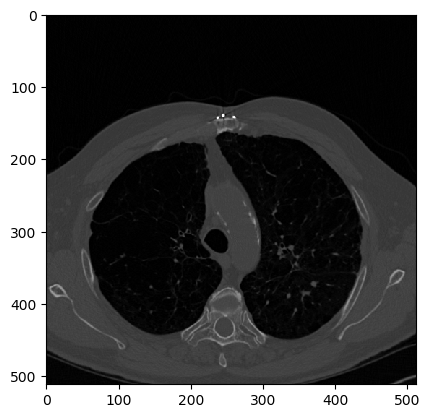

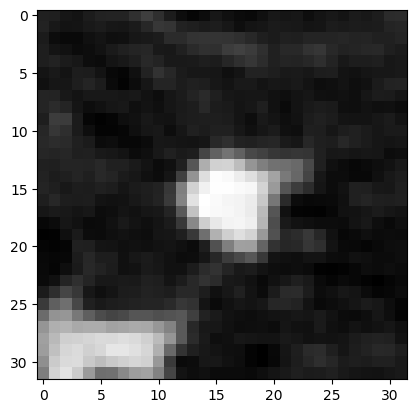

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049555024219115904825


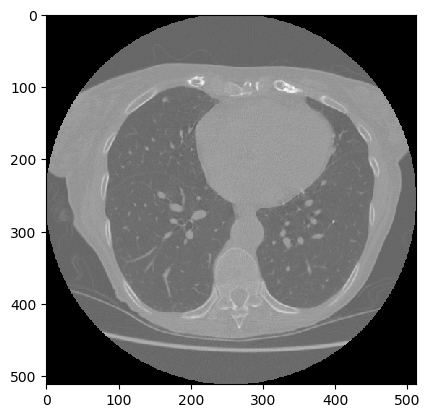

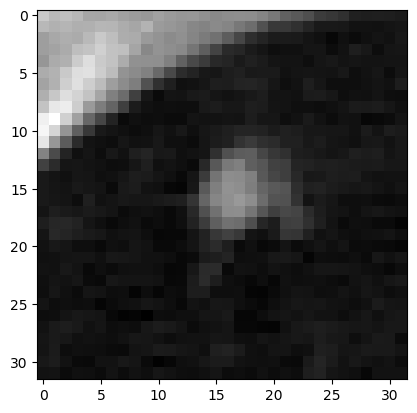

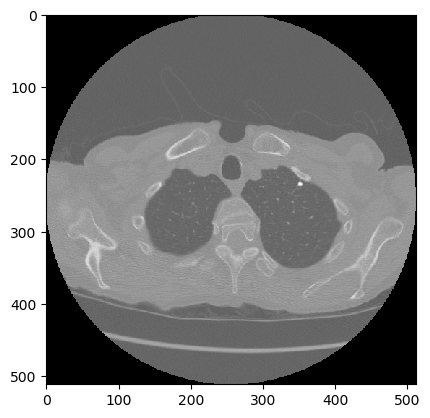

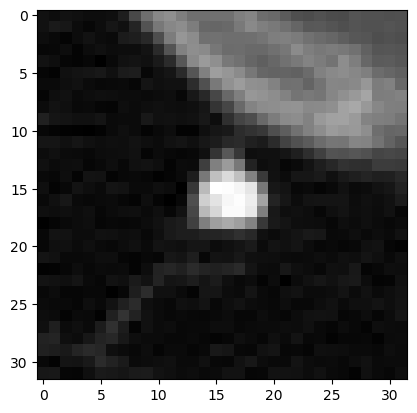

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.199171741859530285887752432478


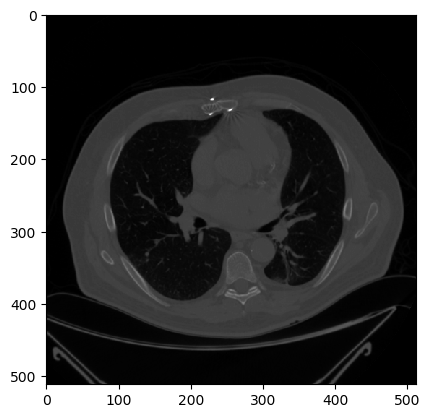

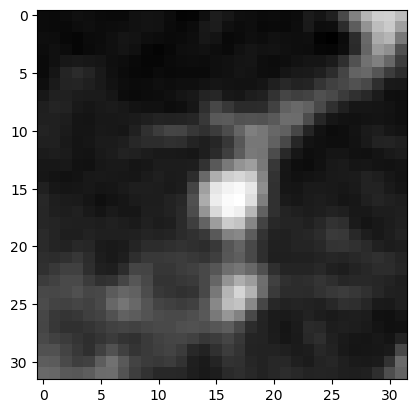

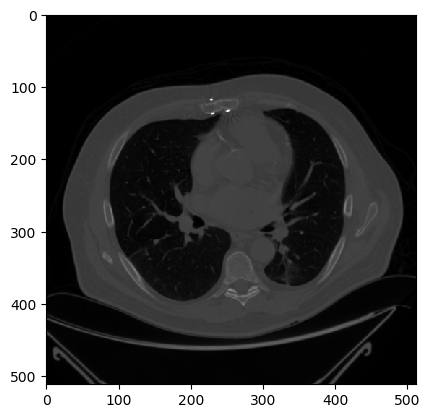

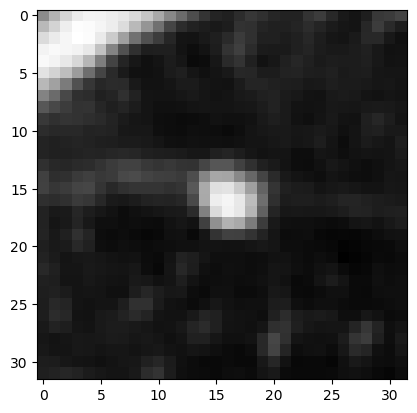

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.395623571499047043765181005112


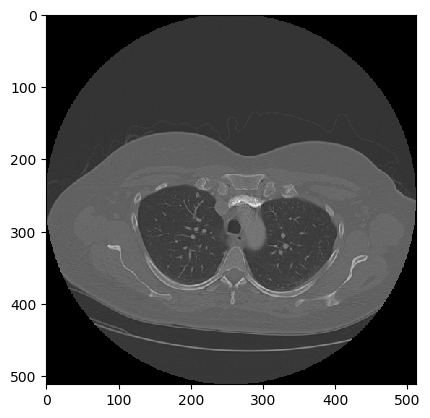

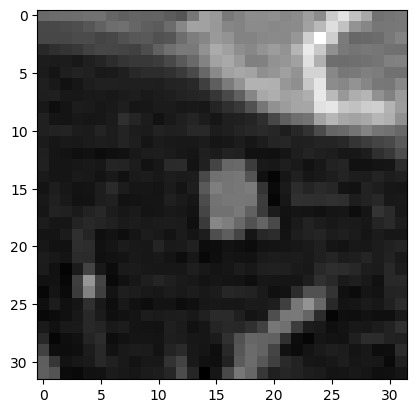

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.935683764293840351008008793409


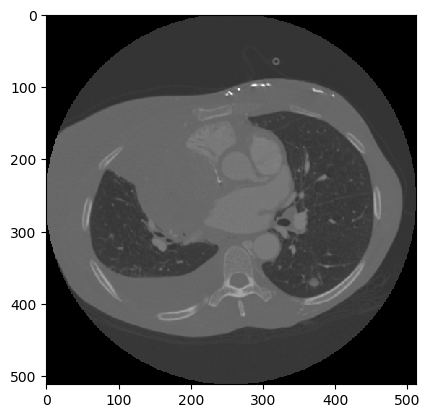

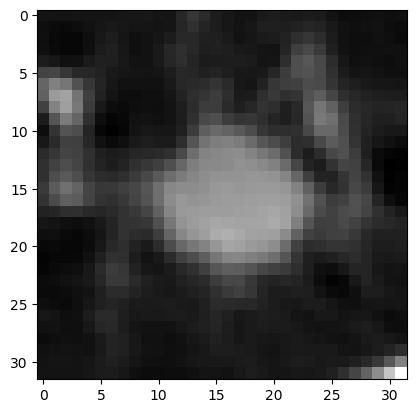

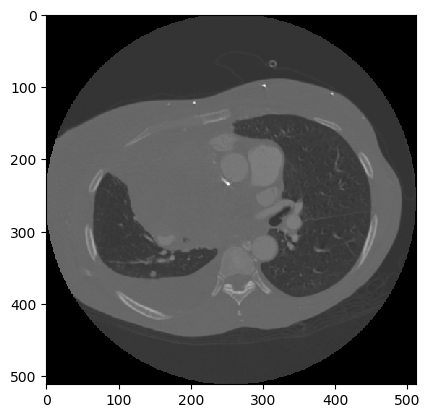

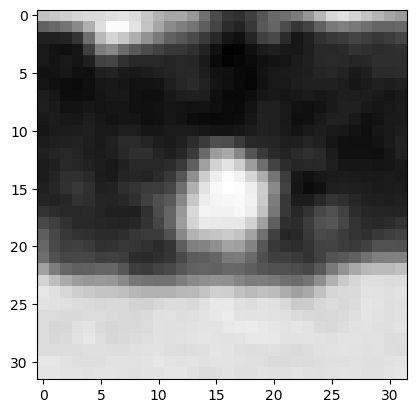

KeyboardInterrupt: 

In [16]:

image_size = 32
root_dir = 'luna16/raw'


mhd_file_paths = glob.glob(os.path.join(root_dir, '*.mhd'))
for mhd in mhd_file_paths:
    file_name = os.path.basename(mhd)[:-4]
    mhd_file = sitk.ReadImage(mhd)
    origin = mhd_file.GetOrigin()
    spacing = mhd_file.GetSpacing()
    ct_scan = np.array(sitk.GetArrayFromImage(mhd_file), dtype=np.float32)
    print('file_name',file_name)
    df_node = pd.read_csv('luna16/annotations.csv')
    slice_list = []
    for index, item in df_node.iterrows():
        if item['seriesuid'] == file_name:
            center = np.array([item['coordX'], item['coordY'], item['coordZ']])
            v_center = np.rint((center - origin) / spacing)
            v_center[0], v_center[1], v_center[2] = v_center[2], v_center[1], v_center[0]
            node_cube = get_cube_from_img(ct_scan, v_center, image_size)
            #print('z:',v_center[0])
            node_slice = int(v_center[0])
            #print(ct_scan.shape)
            #print(ct_scan.max())
            #print(ct_scan.min())
            #print(mhd_file.GetSpacing())
            #print(mhd_file.GetSize())
            #print(mhd_file.GetOrigin())
            #print(mhd_file.GetDirection())
            #print(mhd_file.GetPixelID())
            
            #Saves the Candidate Slice
            #np.save(output_cand_path+str(file_name)+'_'+str(node_slice)+'.npy', ct_scan[node_slice])
            
            plt.imshow(ct_scan[node_slice], cmap='gray')
            plt.show()
            
            plt.imshow(node_cube[16], cmap='gray')
            plt.show()
            

## Candidate Regions of Interest (Nodule or Abnormality)

file_name 1.3.6.1.4.1.14519.5.2.1.6279.6001.172573195301625265149778785969


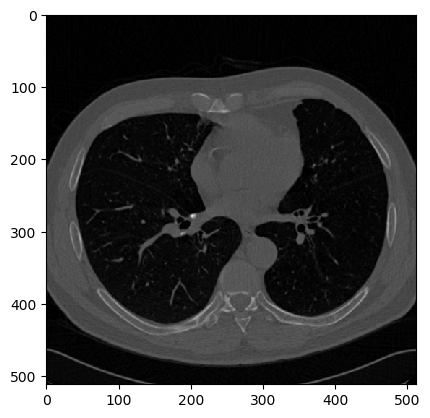

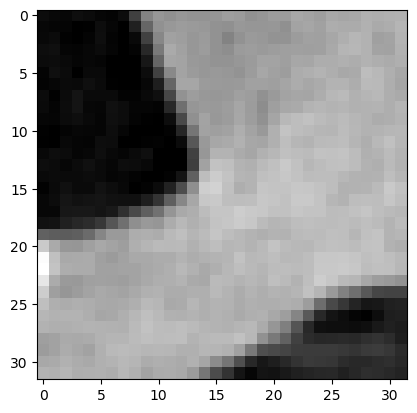

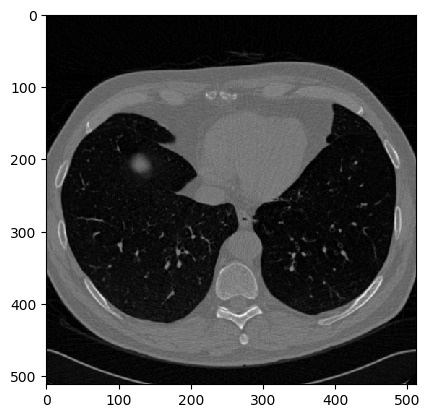

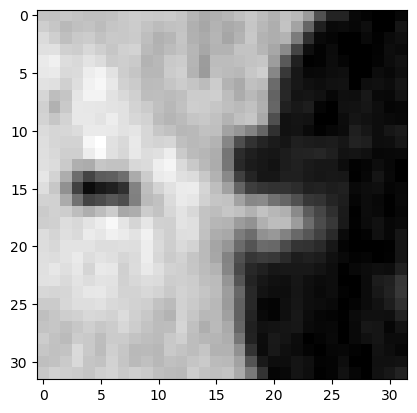

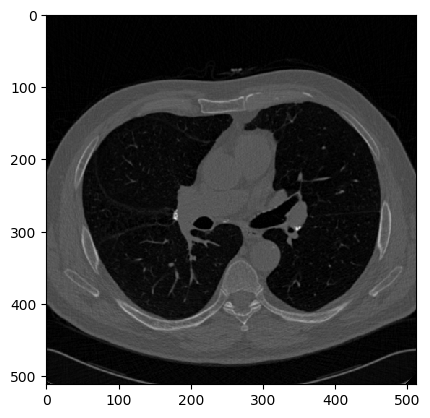

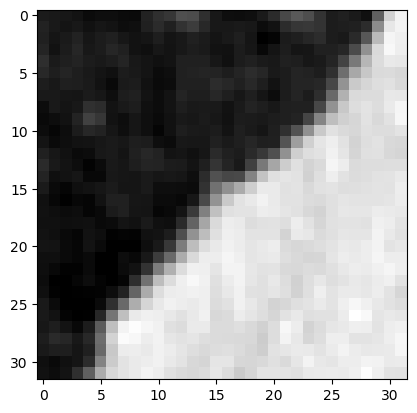

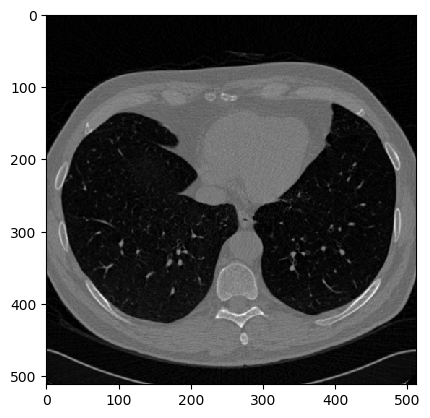

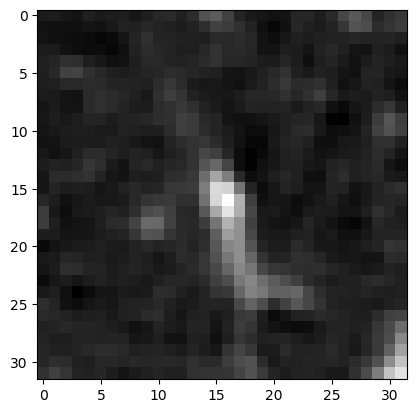

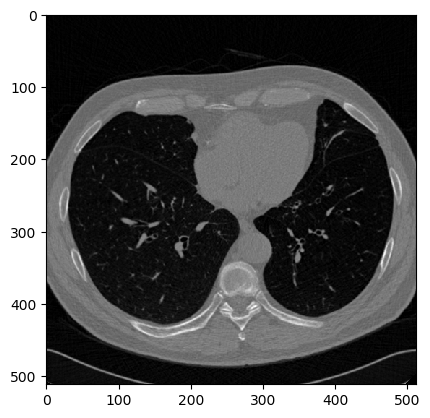

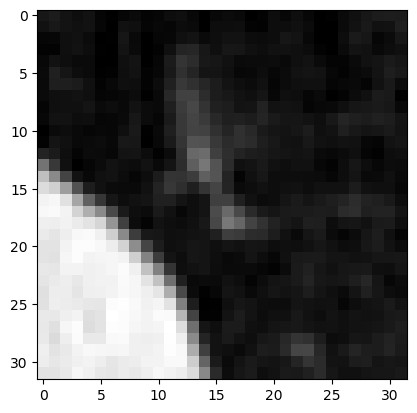

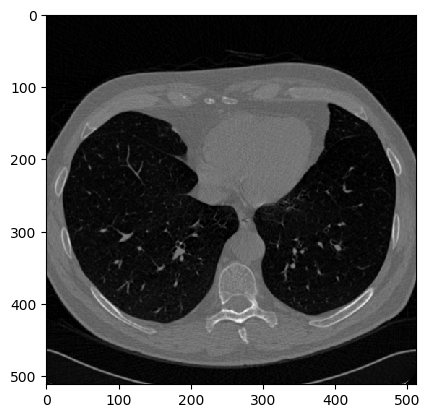

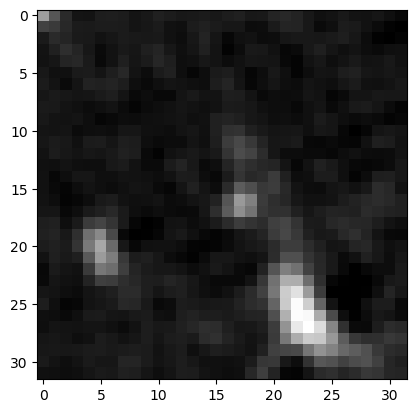

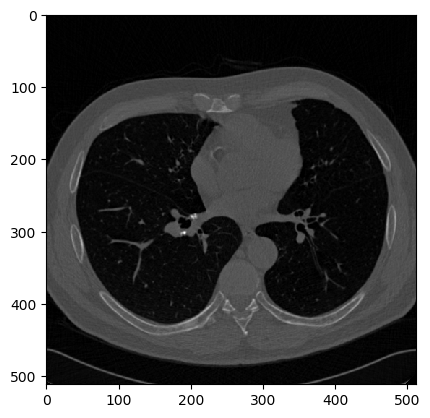

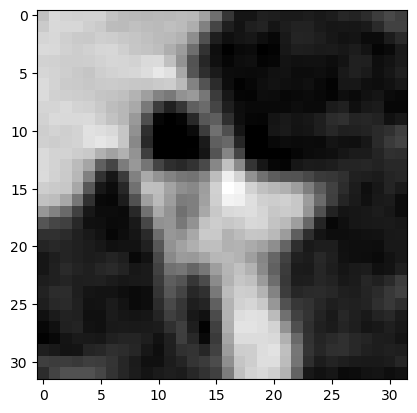

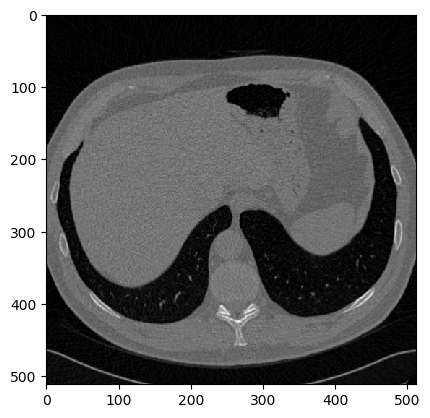

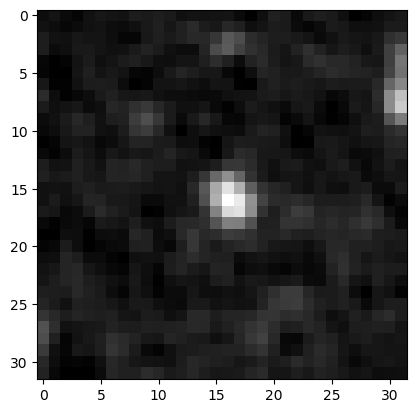

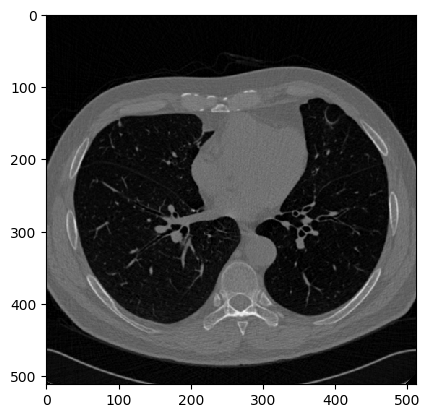

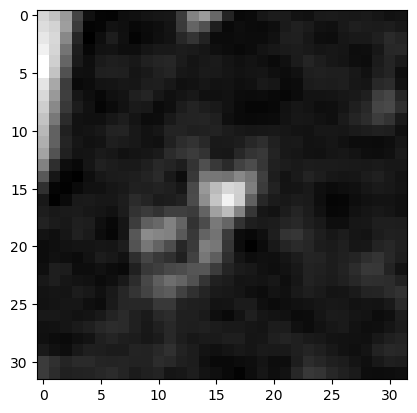

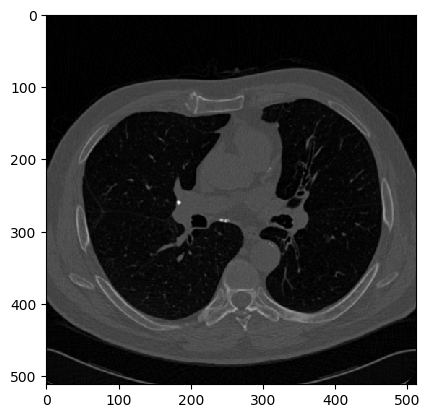

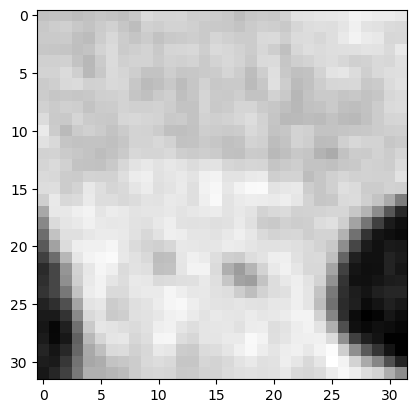

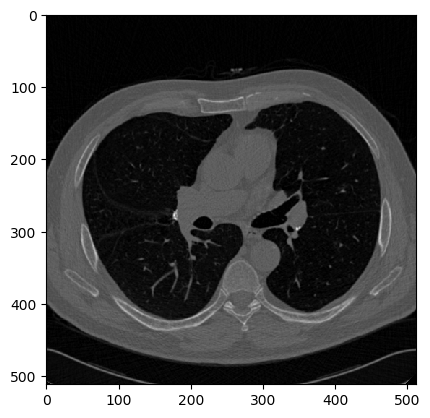

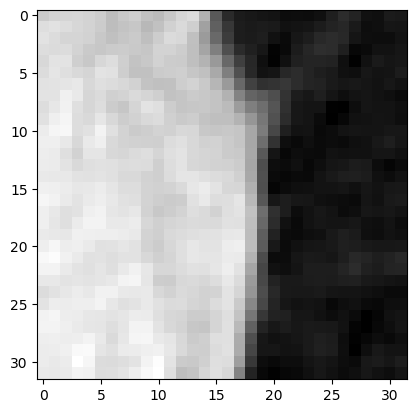

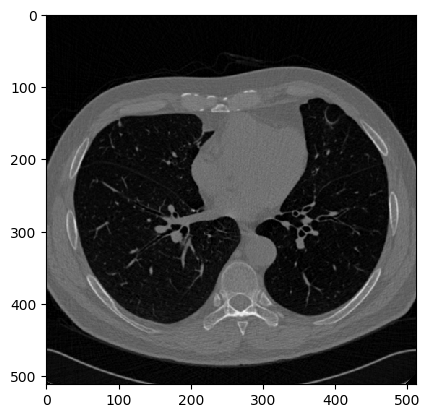

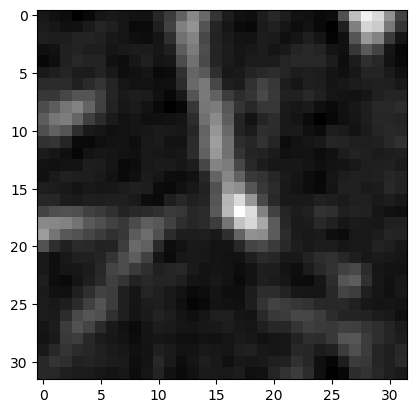

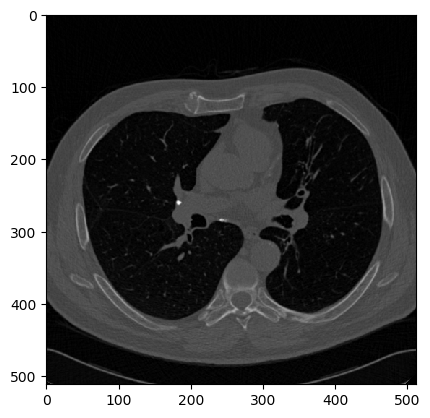

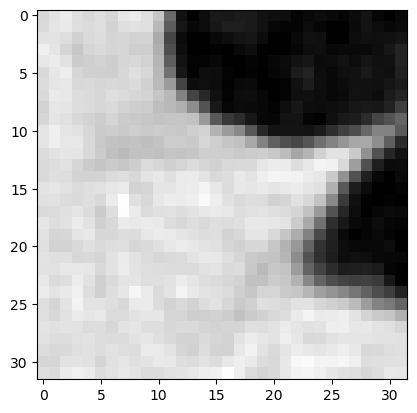

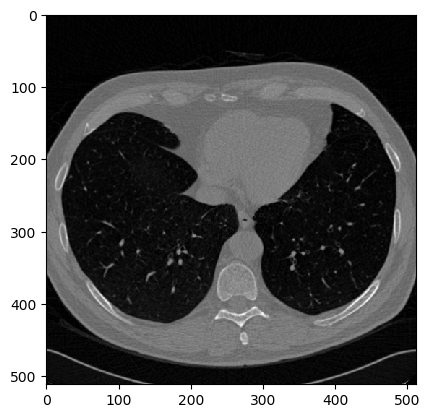

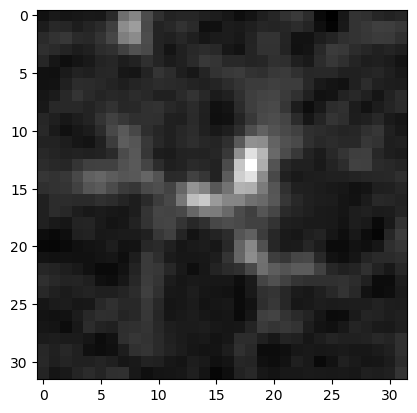

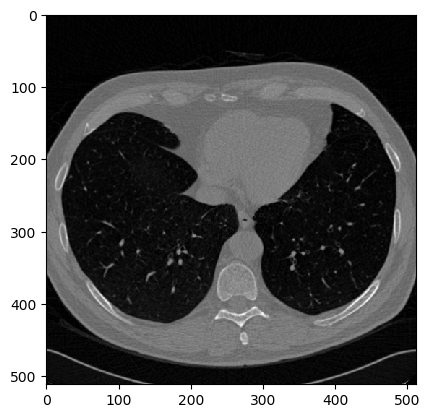

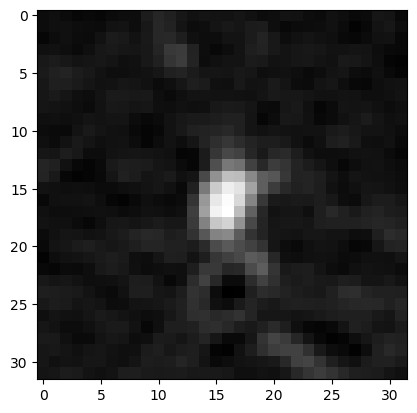

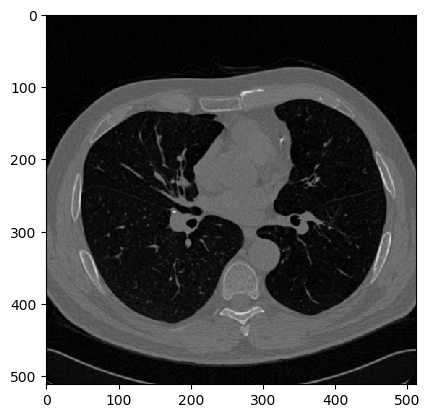

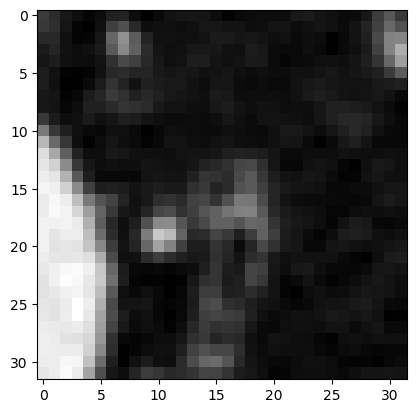

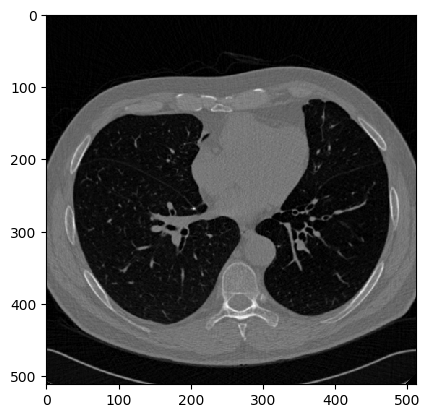

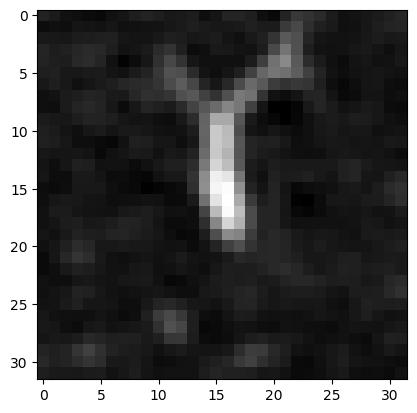

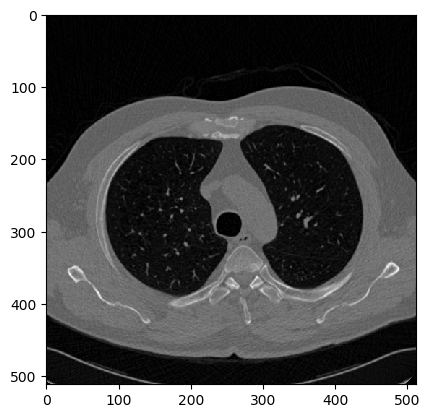

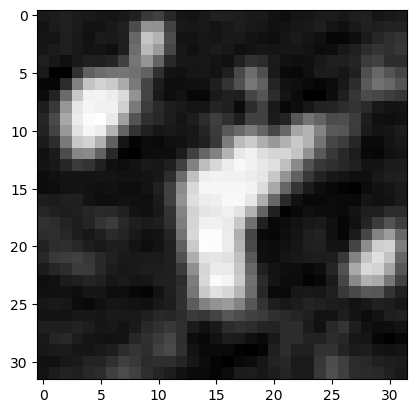

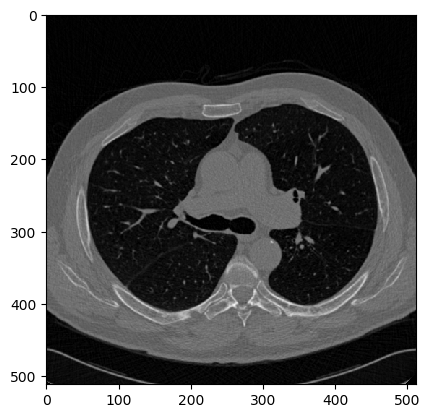

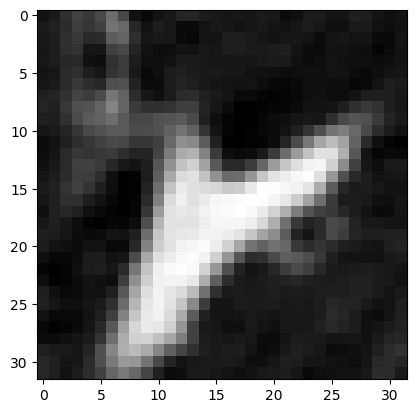

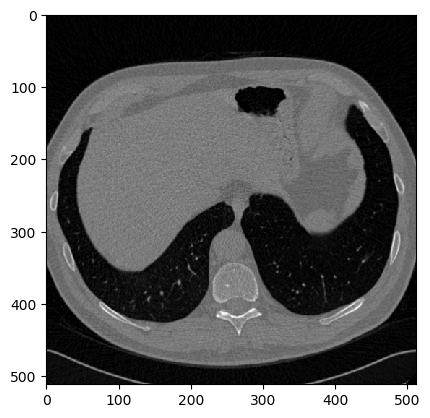

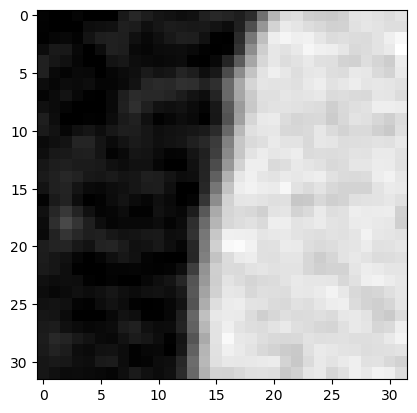

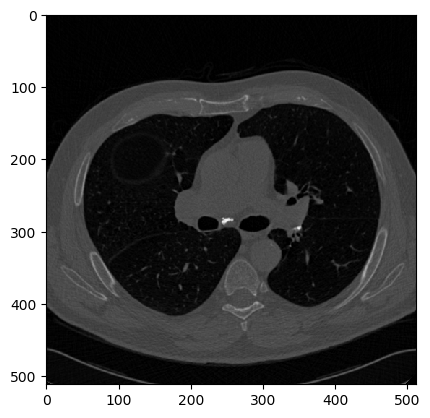

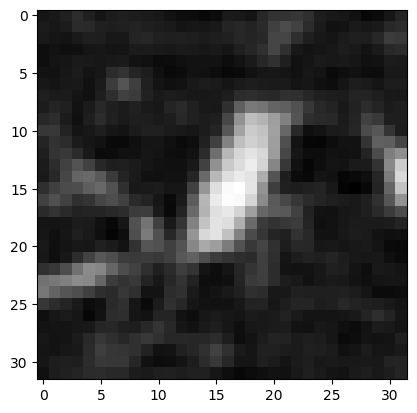

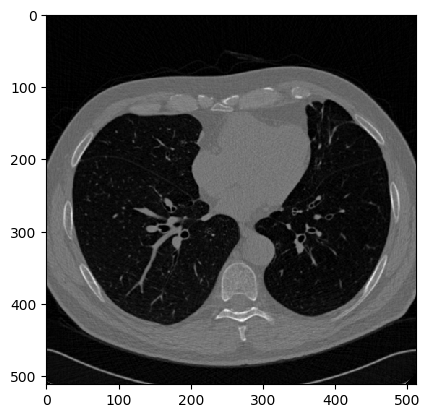

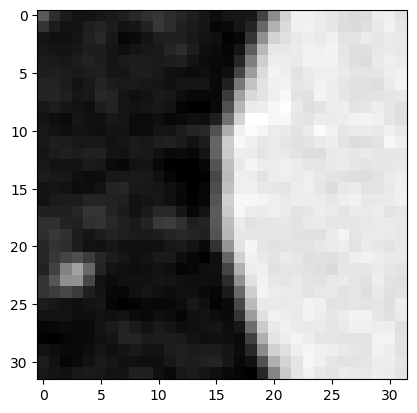

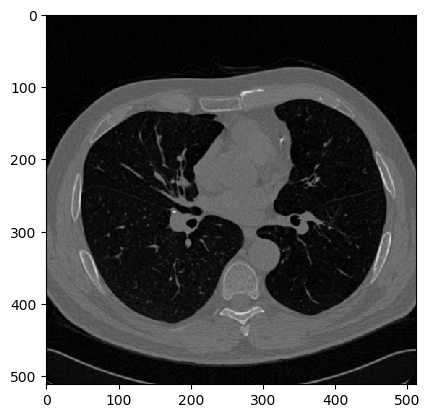

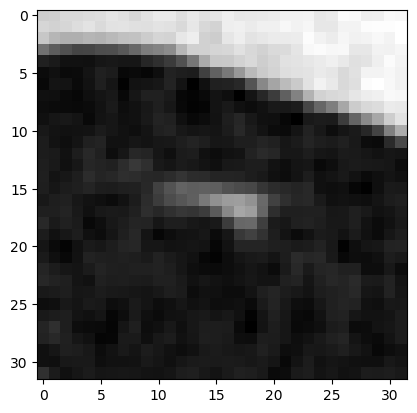

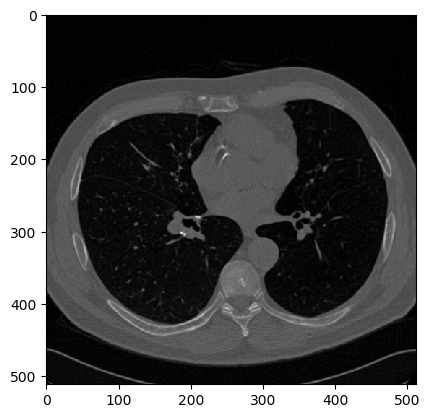

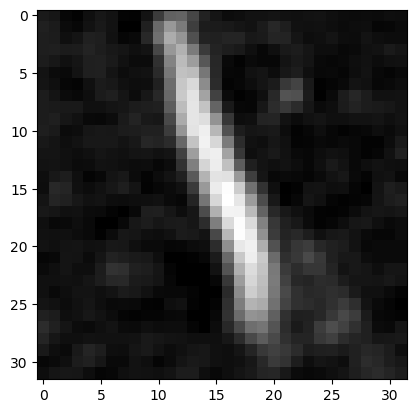

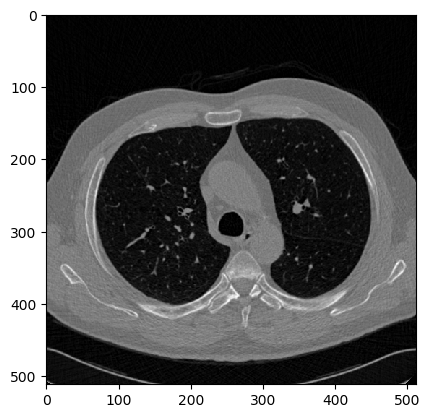

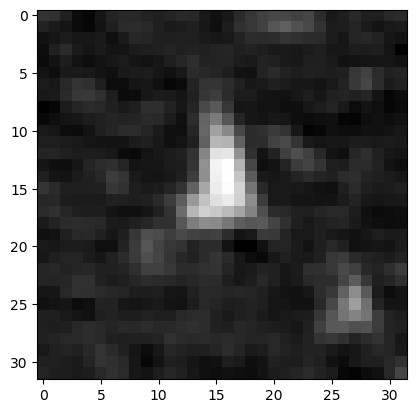

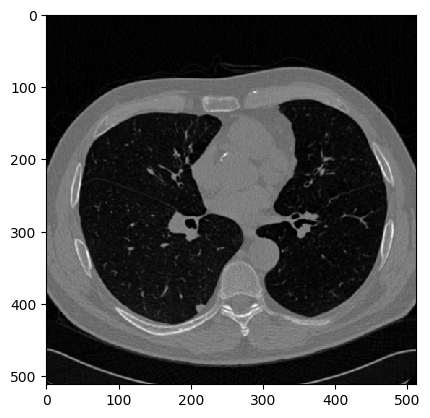

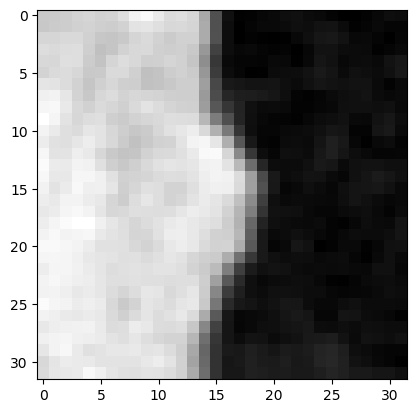

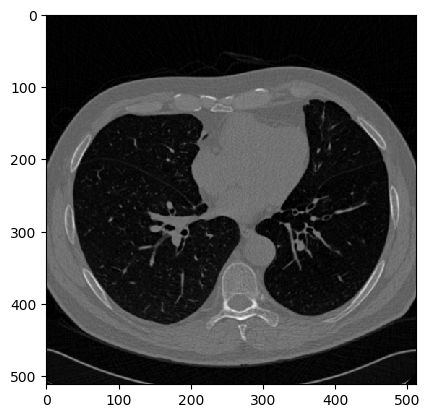

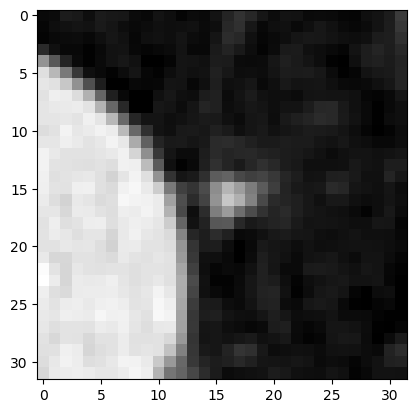

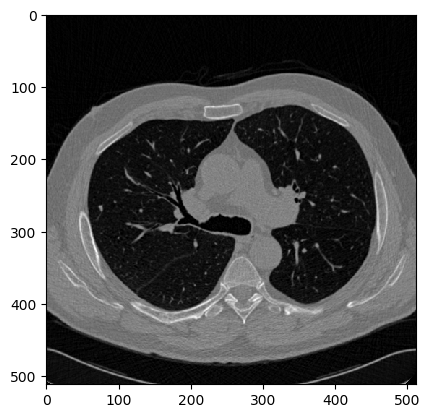

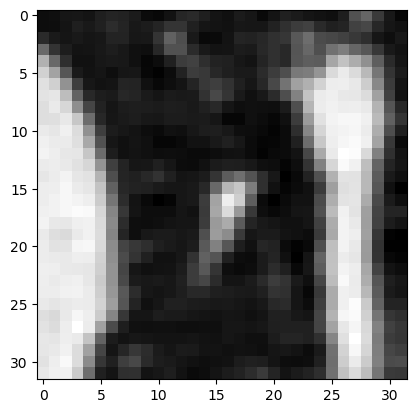

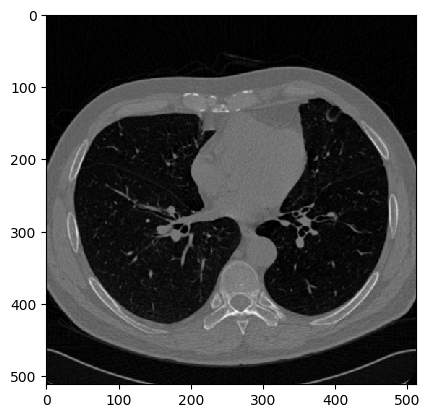

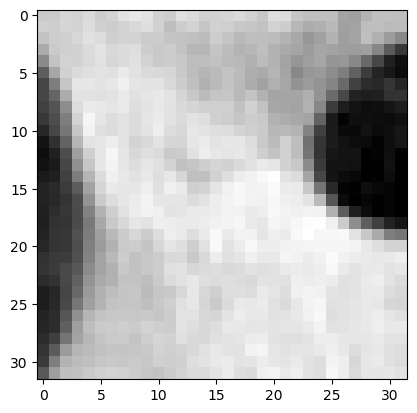

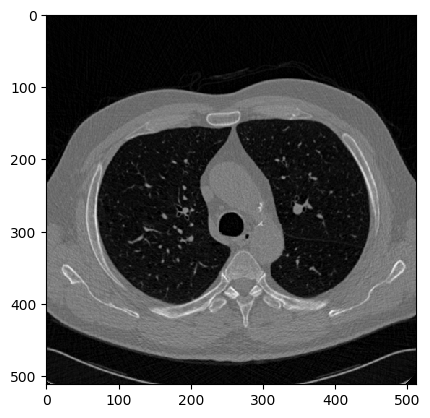

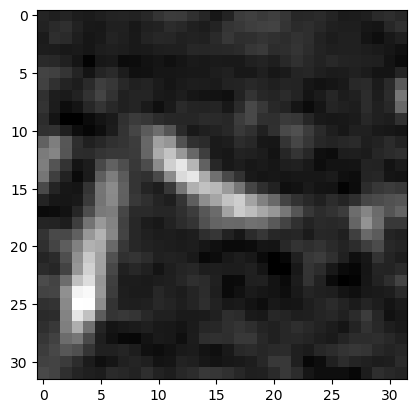

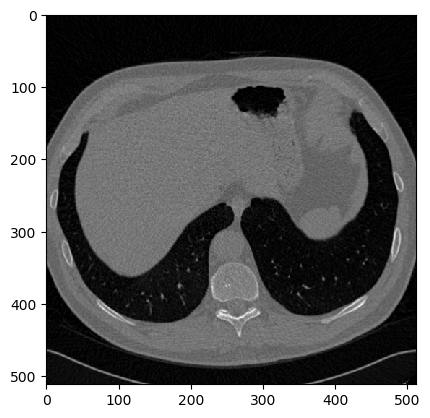

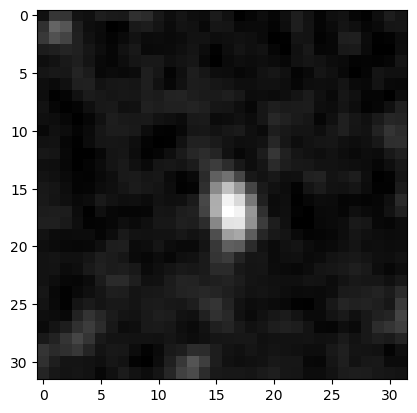

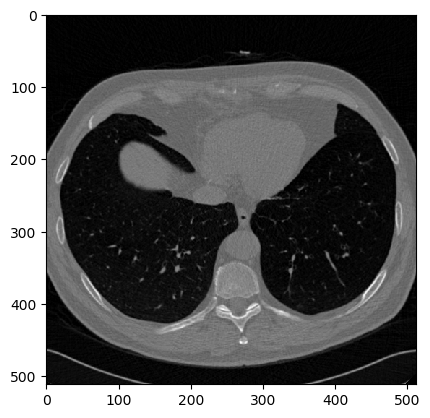

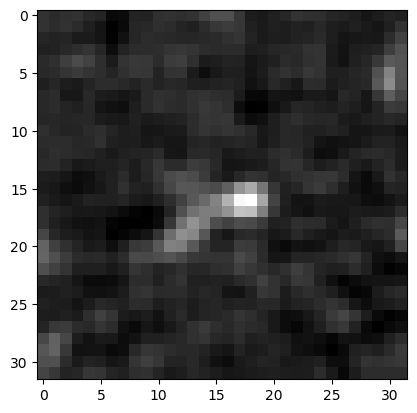

KeyboardInterrupt: 

In [17]:

image_size = 32
root_dir = 'luna16/raw'


mhd_file_paths = glob.glob(os.path.join(root_dir, '*.mhd'))
for mhd in mhd_file_paths:
    file_name = os.path.basename(mhd)[:-4]
    mhd_file = sitk.ReadImage(mhd)
    origin = mhd_file.GetOrigin()
    spacing = mhd_file.GetSpacing()
    ct_scan = np.array(sitk.GetArrayFromImage(mhd_file), dtype=np.float32)
    print('file_name',file_name)
    df_node = pd.read_csv('luna16/candidates.csv')
    slice_list = []
    for index, item in df_node.iterrows():
        if item['seriesuid'] == file_name:
            center = np.array([item['coordX'], item['coordY'], item['coordZ']])
            v_center = np.rint((center - origin) / spacing)
            v_center[0], v_center[1], v_center[2] = v_center[2], v_center[1], v_center[0]
            node_cube = get_cube_from_img(ct_scan, v_center, image_size)
            #print('z:',v_center[0])
            node_slice = int(v_center[0])
            #print(ct_scan.shape)
            #print(ct_scan.max())
            #print(ct_scan.min())
            #print(mhd_file.GetSpacing())
            #print(mhd_file.GetSize())
            #print(mhd_file.GetOrigin())
            #print(mhd_file.GetDirection())
            #print(mhd_file.GetPixelID())
            
            #Saves the Candidate Slice
            #np.save(output_cand_path+str(file_name)+'_'+str(node_slice)+'.npy', ct_scan[node_slice])
            
            plt.imshow(ct_scan[node_slice], cmap='gray')
            plt.show()
            
            plt.imshow(node_cube[16], cmap='gray')
            plt.show()